In [2]:
import astropaint

from astropaint.lib import profile

import healpy as hp 
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib import cm
from matplotlib import rcParams
#%config InlineBackend.figure_format = "retina"

rcParams["figure.figsize"] = (10,7)
rcParams["text.usetex"] = True
rcParams["font.size"] = 18
rcParams["font.family"] = "stix"
rcParams["figure.dpi"]= 200

%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings("ignore")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Catalog

The `Catalog` object reads/simulates a halo catalog. The initial catalog must contain the following columns: 

`x` , `y`, `z`, `v_x`, `v_y`, `v_z`, `M_200c`

Instantiating the class without any input will simulate a set of randomly distributed halos

In [3]:
catalog = astropaint.Catalog()

generating random catalog...

Input data has been modified. Rebuilding the dataframe using catalog.build_dataframe to update all the parameters...

Building the dataframe...

Done!


Extra parameters such as halo radius, distance, etc. can be build using the `.build_dataframe()` method which runs automatically when the catalog data are updated.  

The data frame is stored in the `.data` attribute. 

In [4]:
catalog.data.head()

x          y          z        v_x        v_y        v_z  \
0 -25.271517 -20.640026  37.885880 -32.126198 -57.024174 -59.192776   
1 -26.241627 -20.652569  37.213554 -79.258659  66.609924  63.079277   
2 -33.815289 -35.985443   7.846917 -77.427750  58.809776  32.963551   
3  47.919220 -10.854445   9.269802  10.938124  66.606026  69.833817   
4 -19.630358 -33.464764  31.539795  99.130524 -11.307670 -14.439597   

         M_200c        D_c        lat         lon  ...    R_200c    c_200c  \
0  1.084754e+14  50.000001  49.263395  219.239571  ...  1.005543  4.025473   
1  1.872002e+14  50.000002  48.096526  218.203296  ...  1.206125  3.817951   
2  6.013424e+14  50.000000   9.029231  226.780793  ...  1.779635  3.409331   
3  6.825614e+14  49.999999  10.684224  347.236996  ...  1.856397  3.367691   
4  1.015497e+14  50.000000  39.108867  239.604207  ...  0.983671  4.051317   

    R_th_200c         rho_s       R_s        v_r       v_th        v_ph  \
0   69.136040  1.701961e+14  0.249795  -5.074244  84.813678   23.843779   
1   82.927046  1.514636e+14  0.315909  61.032282 -26.434056 -101.361302   
2  122.358663  1.183843e+14  0.521989  15.212162 -30.959821  -96.697060   
3  127.636445  1.152881e+14  0.551237   8.970411 -69.373403   67.376775   
4   67.632233  1.726227e+14  0.242803 -40.459622 -14.282084   91.226461   

       v_lat       v_lon  
0 -84.813678   23.843779  
1  26.434056 -101.361302  
2  30.959821  -96.697060  
3  69.373403   67.376775  
4  14.282084   91.226461  

[5 rows x 23 columns]

In [5]:
catalog.data.columns

Index(['x', 'y', 'z', 'v_x', 'v_y', 'v_z', 'M_200c', 'D_c', 'lat', 'lon',
       'theta', 'phi', 'D_a', 'R_200c', 'c_200c', 'R_th_200c', 'rho_s', 'R_s',
       'v_r', 'v_th', 'v_ph', 'v_lat', 'v_lon'],
      dtype='object')

new random catalogs can be created using the `generate_random_halos()` method. If `put_on_shell` is `True` the halos will be distributed over a shell, otherwise they are uniformly distributed in a cubic box. 

In [6]:
catalog.data = catalog.generate_random_box(n_tot=1000,
                                           box_size=30,
                                           mass_min=1E14,
                                           mass_max=1E15,
                                           put_on_shell=True)

generating random catalog...

Input data has been modified. Rebuilding the dataframe using catalog.build_dataframe to update all the parameters...

Building the dataframe...

Done!


In [7]:
catalog.build_dataframe()
catalog.data.head()

Building the dataframe...

Done!


x          y          z        v_x        v_y        v_z  \
0  -9.907160 -15.051802  23.985233  45.068008 -95.252937 -28.757677   
1  18.412766   7.369290  22.509190  13.329413 -93.073044 -81.234383   
2 -19.698162 -13.202334 -18.376091   7.768039 -65.051727 -29.256092   
3 -18.737635   1.316786  23.391603  86.334229  61.857288  61.936146   
4   7.804893   8.095522  27.812698 -93.901520  23.936388 -96.071068   

         M_200c        D_c        lat         lon  ...    R_200c    c_200c  \
0  1.121036e+14  29.999999  53.083126  236.646918  ...  1.016631  4.012647   
1  9.121201e+14  30.000000  48.616920   21.812633  ...  2.044753  3.274304   
2  7.460709e+14  29.999999 -37.773127  213.831250  ...  1.912275  3.338754   
3  2.752383e+14  30.000000  51.234957  175.980151  ...  1.371492  3.677835   
4  1.385252e+14  30.000000  67.985640   46.047141  ...  1.090937  3.931115   

    R_th_200c         rho_s       R_s         v_r        v_th       v_ph  \
0  116.497362  1.689995e+14  0.253357    9.915759   61.075592  90.015005   
1  234.311471  1.085243e+14  0.624485  -75.632368   37.040231 -91.362223   
2  219.130534  1.131657e+14  0.572751   41.447707    4.893289  58.362075   
3  157.161383  1.395611e+14  0.372907   -2.915355 -102.549774 -67.757316   
4  125.012227  1.615133e+14  0.277514 -107.036977   -8.435188  84.214187   

        v_lat      v_lon  
0  -61.075592  90.015005  
1  -37.040231 -91.362223  
2   -4.893289  58.362075  
3  102.549774 -67.757316  
4    8.435188  84.214187  

[5 rows x 23 columns]

Let's put these halos on a canvas!

# Canvas 

The `Canvas` object locates the halo centers and extents on a healpy map. We can initialize it by feeding in a `Catalog` object and an `nside` for the map. 

In [8]:
canvas = astropaint.Canvas(catalog,
                           nside = 256,
                           analyze=False)

Let's check out the locations of the halos with a scatter plot

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


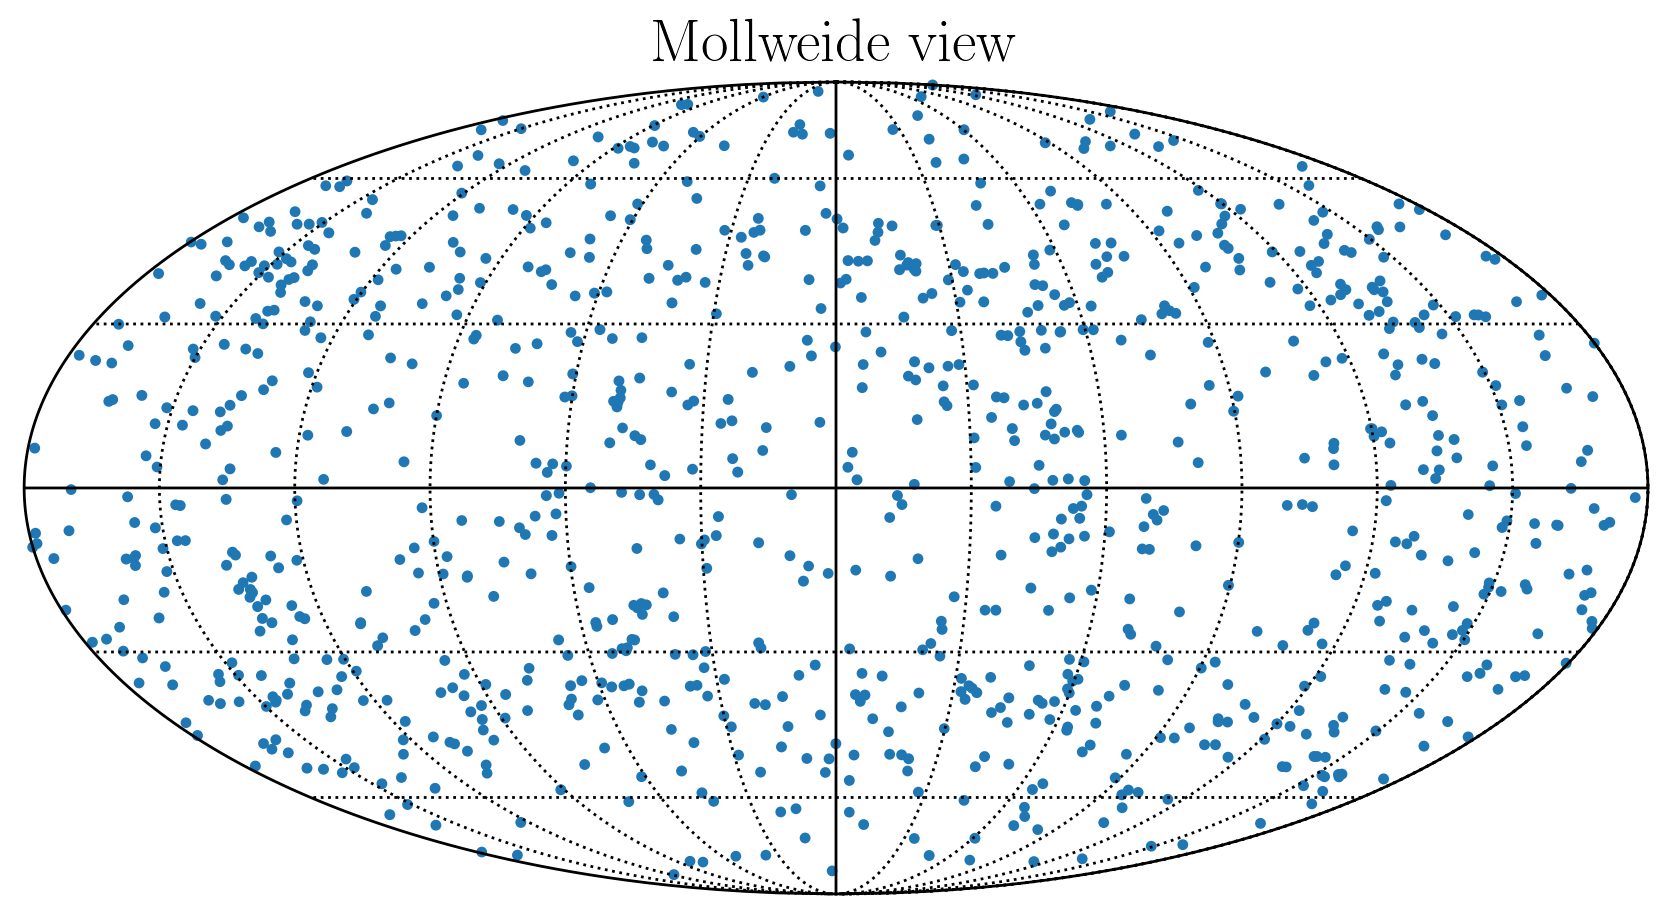

In [9]:
canvas.show_halo_centers("mollview",
                        marker='.',
                        )

and in cartesian projection

0.0 135.5224878140701 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


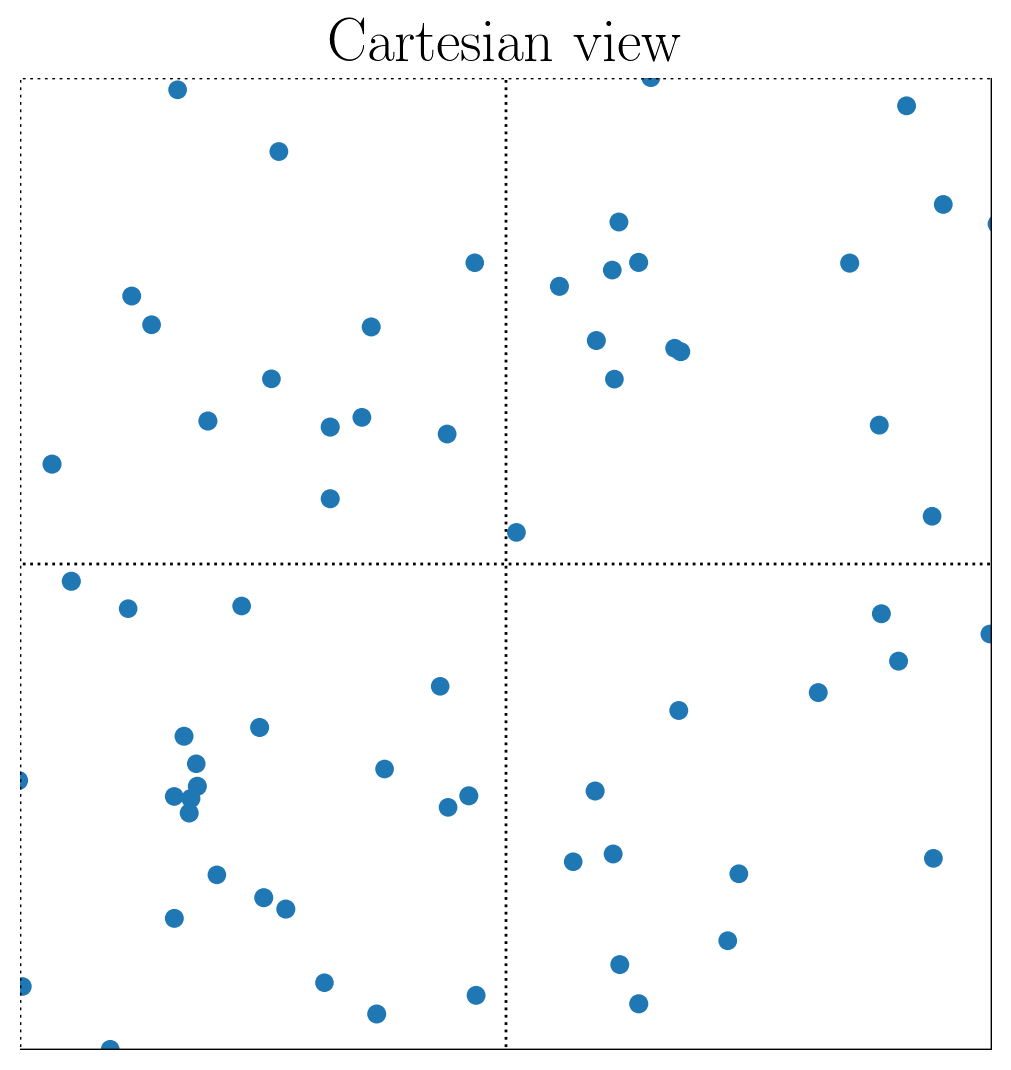

In [10]:
canvas.show_halo_centers("cartview",
                        lonra=[0,60],
                        latra=[0,60],
                        )

The canvas provides methods for finding the pixel number of halo centers, as well as their angular positions in spehrical coordinates

In [11]:
canvas.find_centers_indx()

Done! You can now get the center pixels using Canvas.centers_indx.


In [12]:
canvas.find_centers_ang()

Done! You can now get the angular position of the discs using Canvas.centers_ang.


Similarly you can find the pixels around each halo center using `find_discs_indx(R_times)`. The method finds all the pixels within `R_times` the virial radius of the halo center. 

In [13]:
canvas.find_discs_indx(R_times=1)

Done! You can now get the discs using Canvas.discs_indx.


And `find_discs_ang()` calculates the angular position of each pixel of the discs.

In [14]:
canvas.find_discs_ang()

Done! You can now get the angular position of the discs using Canvas.discs_ang.


Let's check out the discs

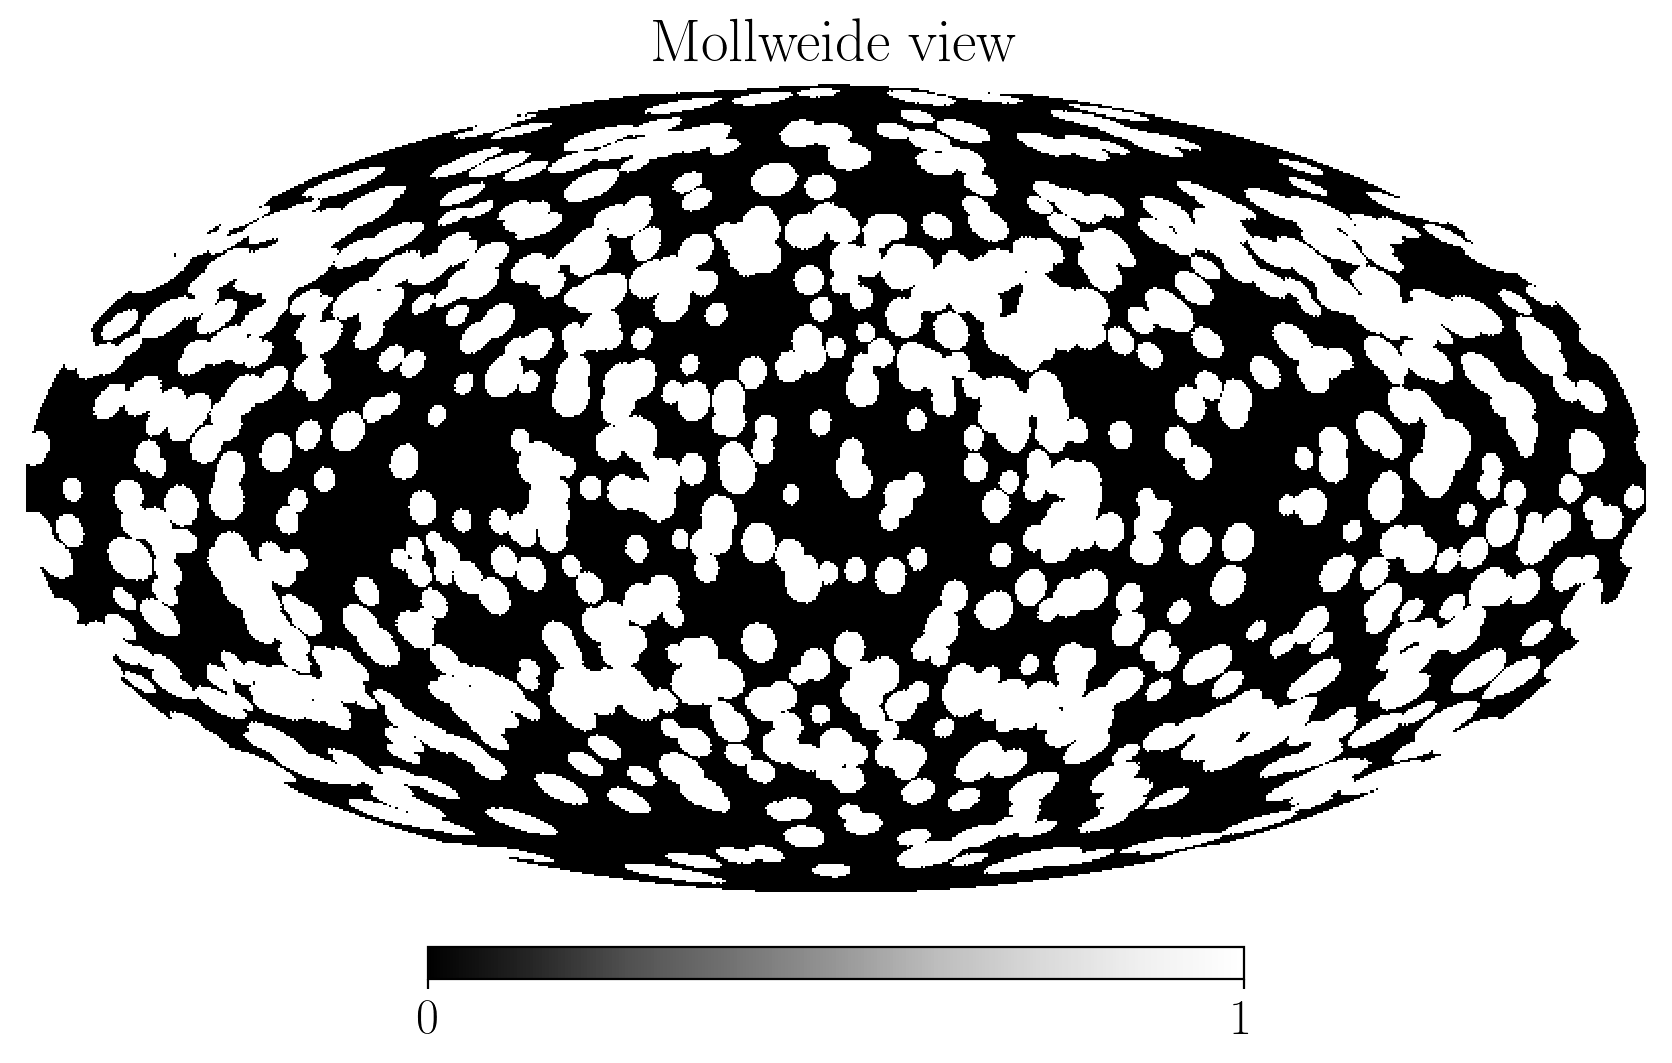

In [15]:
canvas.cmap = cm.Greys_r

canvas.show_discs()

`find_discs_2center_distance()` finds the angular distance of each pixel to the halo center in units of radians and also Mpc. 

In [16]:
canvas.find_discs_2center_distance()

The distances in radians can be accessed via `.discs_2center_rad` and in units of Mpc via `.discs_2center_mpc`.

# Painter

The `Painter` object paints a signal on top of the canvas according to an input template

In [17]:
painter = astropaint.Painter(template=profile.solid_sphere_proj)

The template 'solid_sphere_proj' takes in the following arguments:
['r', 'M_200c', 'R_200c']
and the following keyword-only arguments:
[]


In [18]:
# change the color map to RdYlBu
canvas.cmap = cm.RdYlBu_r

If the canvas has been painted on previously, it can be cleaned using `.clean()`

In [19]:
canvas.clean()

The painter paints the signal on the canvas using the `.spray()` method

In [20]:
painter.spray(canvas)

Painting the canvas...
No template_kwargs provided
spray_df.columns = Index(['M_200c', 'R_200c'], dtype='object')
Your artwork is fininshed. Check it out with Canvas.show_map()


0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


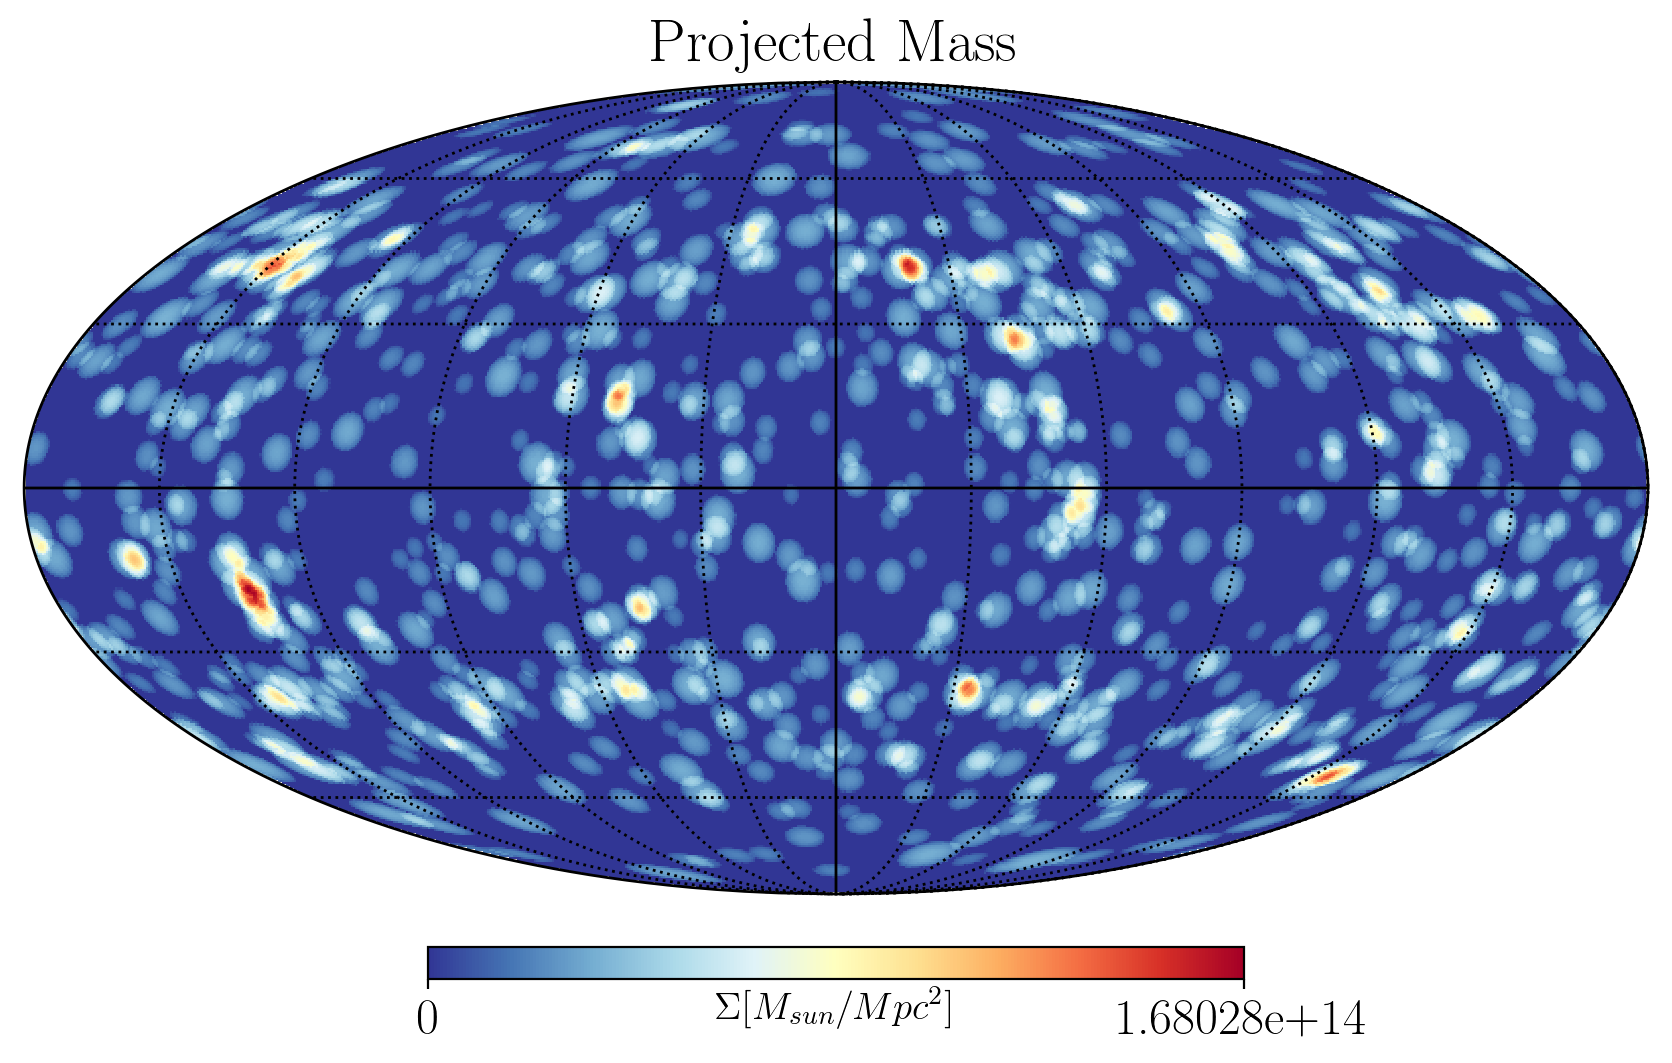

In [21]:
canvas.show_map(projection="mollview",
                title="Projected Mass",
                unit="$\Sigma [M_{sun}/Mpc^2$]")
hp.graticule()

33.59037789072914 116.40962210927087 -27.870395409510863 57.87039540951086
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


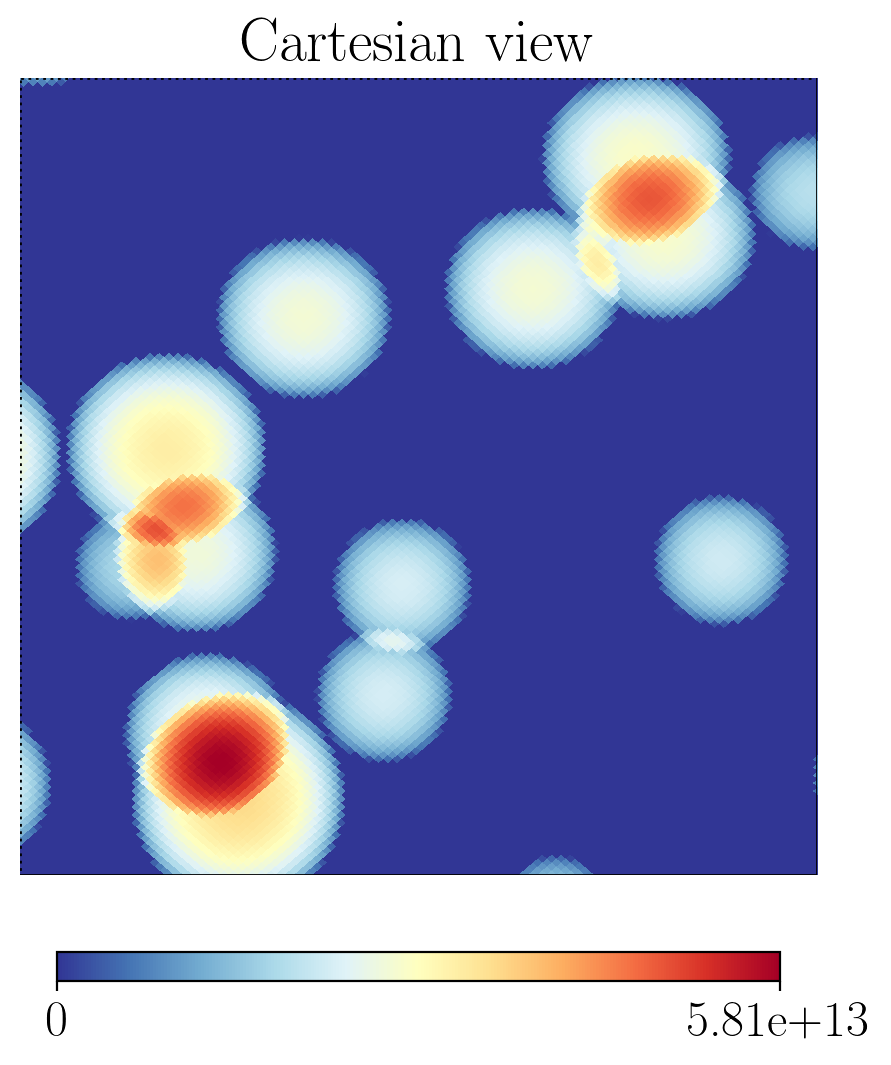

In [22]:
canvas.show_map(projection="cartview",
               lonra=[0,30],
               latra=[0,30])
hp.graticule()


The painter can take any arbitrary function that takes `r` as the first argument. To demonstrate this, let's define an absurd radial profile that oscilates as `sin(5*r/R_200c)` and is proportional to `M_200c`! 

In [38]:
def crazy_profile(r, R_200c, M_200c):
    
    return np.sin(4*r/R_200c)*M_200c

In [32]:
painter = astropaint.Painter(crazy_profile)

The template 'crazy_profile' takes in the following arguments:
['r', 'R_200c', 'M_200c', 'v_r']
and the following keyword-only arguments:
[]


Painting the canvas...
No template_kwargs provided
spray_df.columns = Index(['M_200c', 'v_r', 'R_200c'], dtype='object')
Your artwork is fininshed. Check it out with Canvas.show_map()


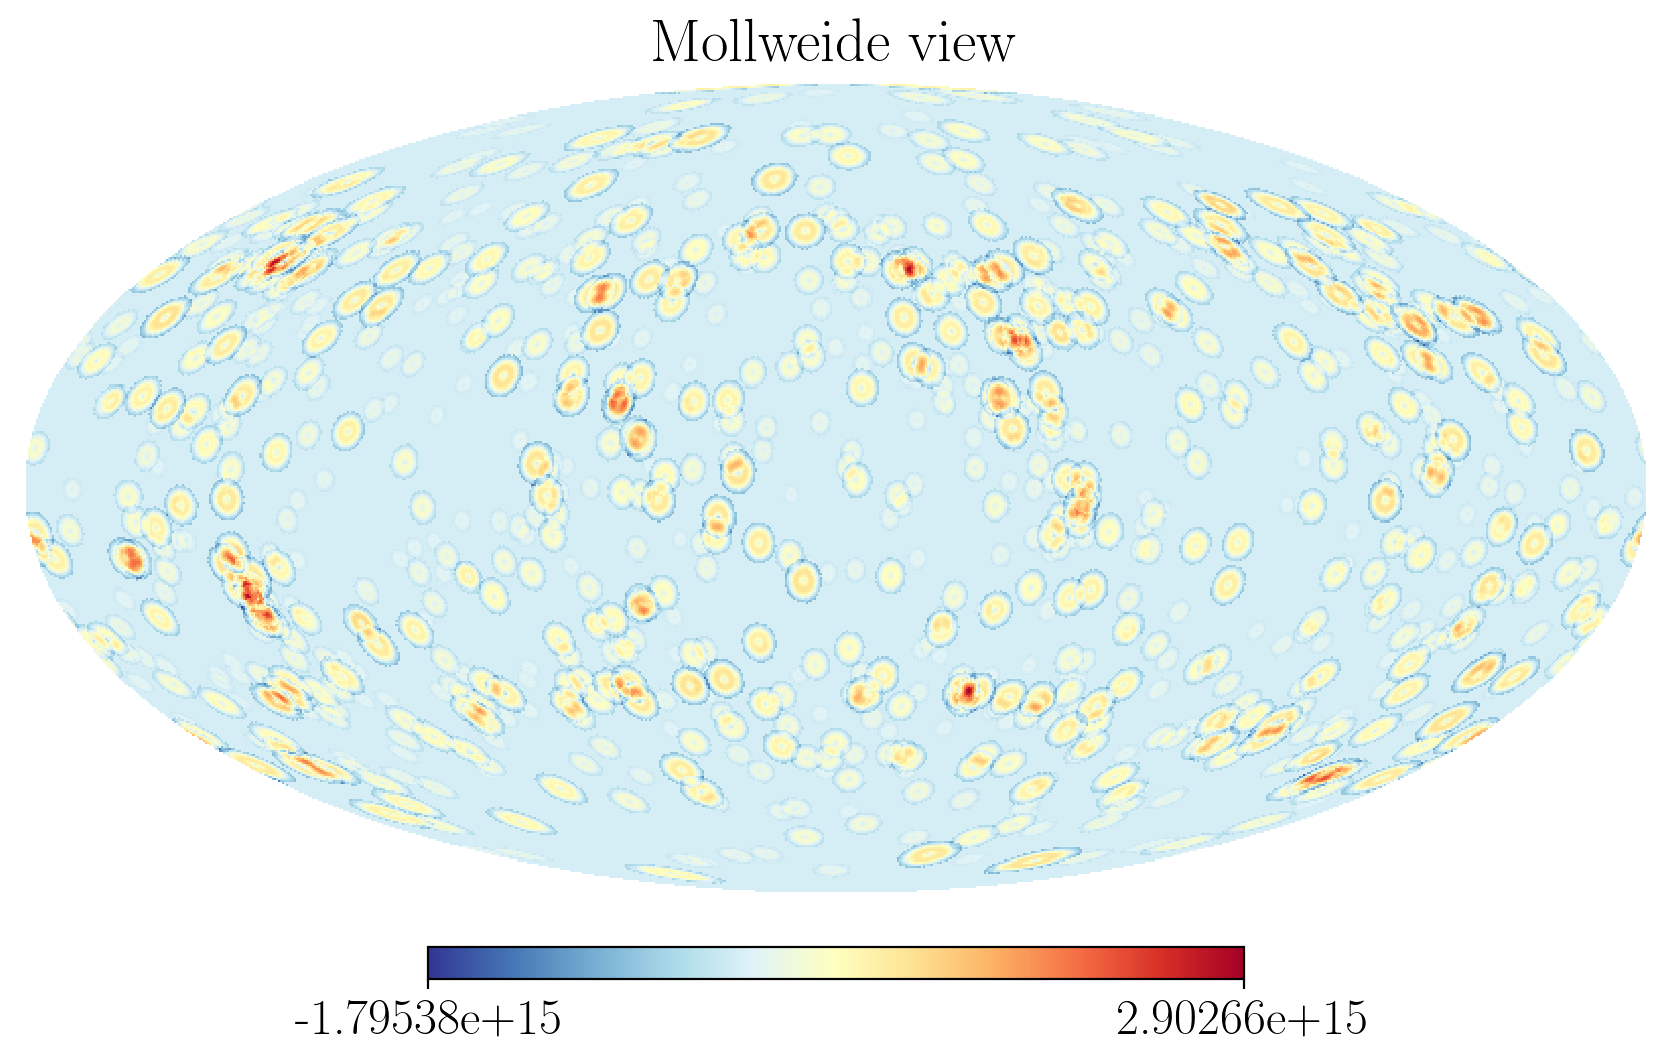

In [35]:
canvas.clean()
painter.spray(canvas)
canvas.show_map()

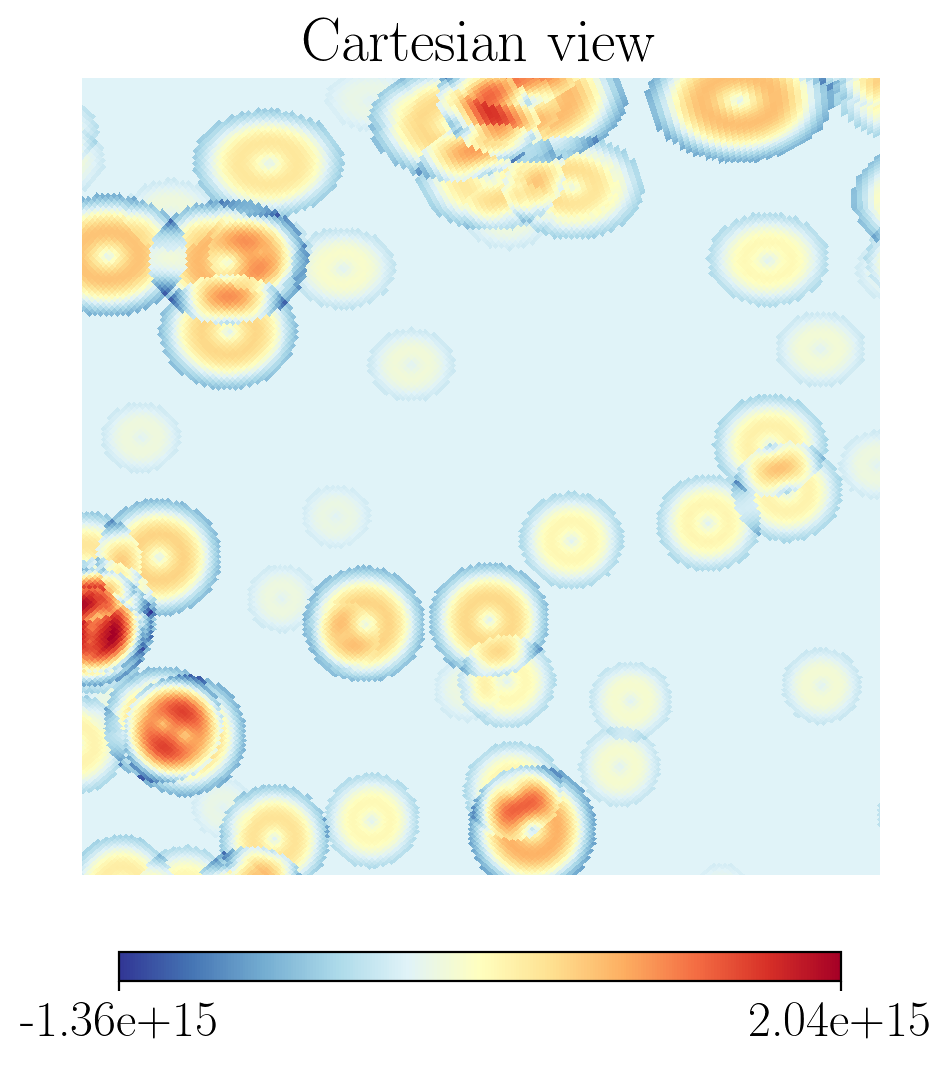

In [37]:
canvas.show_map("cartesian",
               lonra=[0,50],
               latra=[0,50])

Notice that we didn't have to define `R_200c` or `M_200c`! The painter looks up the function arguments in the catalog and uses them if they exist. 

# kinetic Sunyaev Zeldovich (in progress...)

Now let's try to make a more realistic map. We will generate a larger catalog and then paint the kSZ signal over the halos. 

In [6]:
catalog = astropaint.Catalog()
catalog.data = catalog.generate_random_box(n_tot=100000,
                                           box_size=30,
                                           mass_min=1E14,
                                           mass_max=1E15,
                                           put_on_shell=True)

generating random catalog...

Input data has been modified. Rebuilding the dataframe using catalog.build_dataframe to update all the parameters...

Building the dataframe...

Done!
generating random catalog...

Input data has been modified. Rebuilding the dataframe using catalog.build_dataframe to update all the parameters...

Building the dataframe...

Done!


In [7]:
canvas = astropaint.Canvas(catalog,
                           nside=512)

Done! You can now get the center pixels using Canvas.centers_indx.
Done! You can now get the angular position of the discs using Canvas.centers_ang.
Done! You can now get the discs using Canvas.discs_indx.
Done! You can now get the angular position of the discs using Canvas.discs_ang.


In [8]:
kSZ_painter = astropaint.Painter(template=profile.kSZ_T_NFW)
kSZ_painter.spray(canvas)

The template 'kSZ_T_NFW' takes in the following arguments:
['r', 'rho_s', 'R_s', 'v_r']
and the following keyword-only arguments:
['T_cmb']
Painting the canvas...
No template_kwargs provided
spray_df.columns = Index(['rho_s', 'R_s', 'v_r'], dtype='object')
Your artwork is fininshed. Check it out with Canvas.show_map()


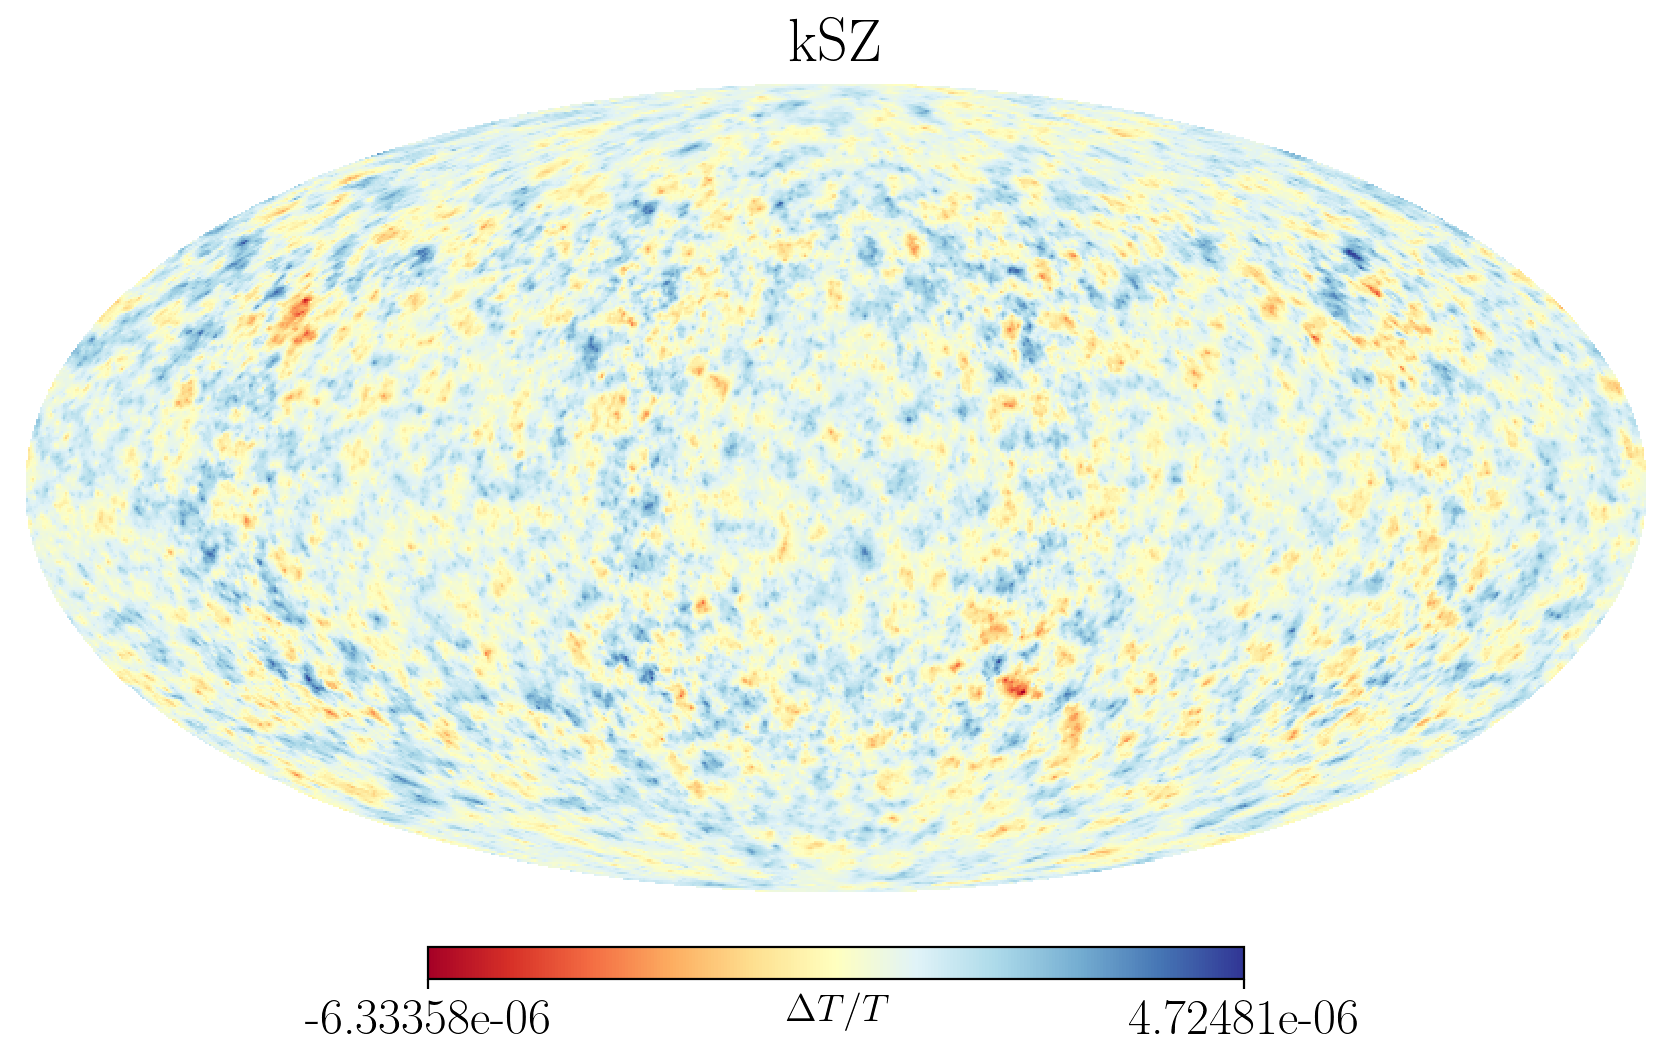

In [17]:
canvas.cmap = cm.RdYlBu
canvas.show_map(title="kSZ",
                unit="$\Delta T/T$")

# Birkinshaw-Gull (in progress...)

In [65]:
catalog.data = catalog.generate_random_box(n_tot=10000,
                                           box_size=200,
                                           mass_min=1E13,
                                           mass_max=1E15,
                                           put_on_shell=True)



generating random catalog...

Input data has been modified. Rebuilding the dataframe using catalog.build_dataframe to update all the parameters...

Building the dataframe...

Done!


You can also paint signals around the halos that are not axially symmetric. The canvas can not only find the distance from the halo center to each pixel, but also the unit vector `r_hat` pointing to each pixel. 

In [66]:
canvas = astropaint.Canvas(catalog,
                          nside=512,
                          R_times=20)


Done! You can now get the center pixels using Canvas.centers_indx.
Done! You can now get the angular position of the discs using Canvas.centers_ang.
Done! You can now get the discs using Canvas.discs_indx.
Done! You can now get the angular position of the discs using Canvas.discs_ang.


In [67]:
canvas.find_discs_2center_vec()

Done! You can now get the vectots pointing to the disc pixels using Canvas.discs_vec.
Done! You can now get the center pixel vectors using Canvas.centers_vec.


In [68]:
painter = astropaint.Painter(profile.BG_NFW)


The template 'BG_NFW' takes in the following arguments:
['r', 'r_hat', 'c_200c', 'R_200c', 'M_200c', 'theta', 'phi', 'v_th', 'v_ph']
and the following keyword-only arguments:
['T_cmb']


In [69]:
painter.spray(canvas)

Painting the canvas...
No template_kwargs provided
The following parameters were not found in the canvas.catalog.data
['r_hat']
Make sure you pass them as kwargs (key=value), dictionary (**dict), or Pandas DataFrame (**df) in the .spray method. Check the spray docstring(.spray.__doc__) for examples. 
spray_df.columns = Index(['v_ph', 'M_200c', 'R_200c', 'phi', 'v_th', 'c_200c', 'theta'], dtype='object')
Your artwork is fininshed. Check it out with Canvas.show_map()


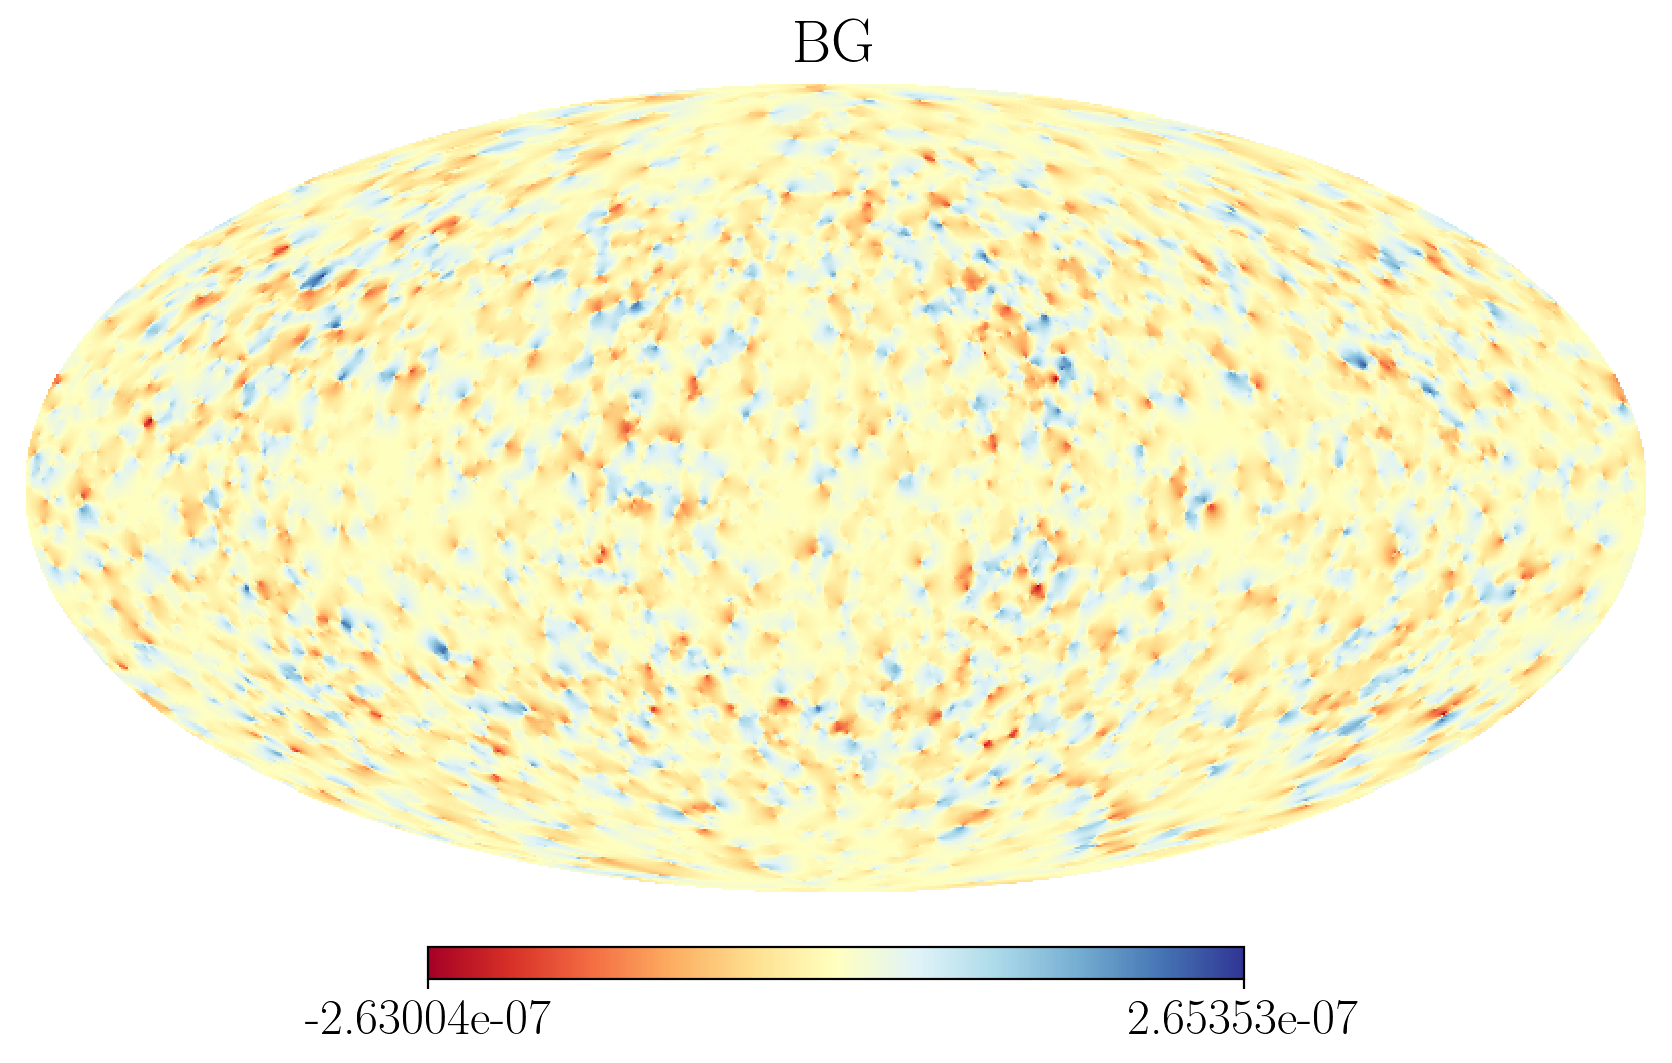

In [72]:
canvas.cmap = cm.RdYlBu
canvas.show_map(title="BG")

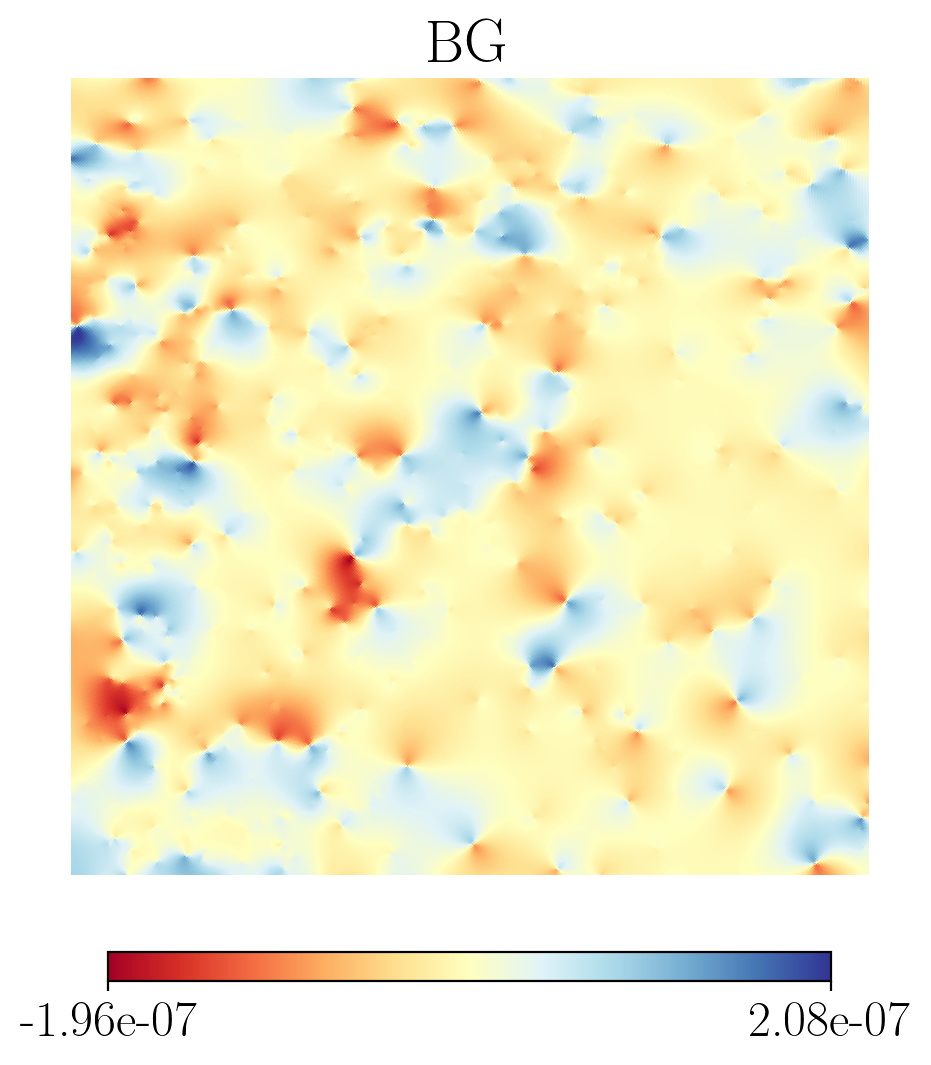

In [73]:

canvas.show_map("cartesian",
                title="BG",
               lonra=[0,50],
               latra=[0,50])